In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

%matplotlib inline

In [3]:
df=pd.read_csv('kc_housing_data_location_and_high_correlation.csv')
df.head()

,price,is_cust_build,grade,view,waterfront,lat,long,zipcode,sqft_living,bedrooms,bathrooms,floors,sqft_living15,sqft_above,date,has_basement,years_since_renovated,condition
0,221900.0,0,7,0.0,0.0,47.5112,-122.257,98178,1180,3,1.00,1.0,1340,1180,10/13/2014,0,0.0,3
1,538000.0,0,7,0.0,0.0,47.7210,-122.319,98125,2570,3,2.25,2.0,1690,2170,12/9/2014,1,29.0,3
2,180000.0,0,6,0.0,0.0,47.7379,-122.233,98028,770,2,1.00,1.0,2720,770,2/25/2015,0,0.0,3
3,604000.0,0,7,0.0,0.0,47.5208,-122.393,98136,1960,4,3.00,1.0,1360,1050,12/9/2014,1,0.0,5
4,510000.0,0,8,0.0,0.0,47.6168,-122.045,98074,1680,3,2.00,1.0,1800,1680,2/18/2015,0,0.0,3


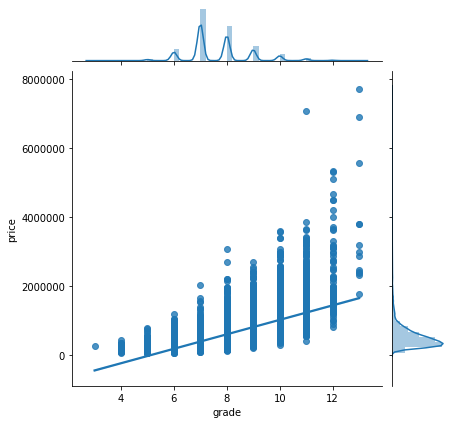

In [4]:
sns.jointplot('grade','price', data=df, kind='reg');

# Price Vs Columns

In [5]:
df_grade = df.drop(columns=['lat','long', 'zipcode','date', 'sqft_living'])

subset = df_grade.drop(columns=['price'])
df_grade.head()

,price,is_cust_build,grade,view,waterfront,bedrooms,bathrooms,floors,sqft_living15,sqft_above,has_basement,years_since_renovated,condition
0,221900.0,0,7,0.0,0.0,3,1.00,1.0,1340,1180,0,0.0,3
1,538000.0,0,7,0.0,0.0,3,2.25,2.0,1690,2170,1,29.0,3
2,180000.0,0,6,0.0,0.0,2,1.00,1.0,2720,770,0,0.0,3
3,604000.0,0,7,0.0,0.0,4,3.00,1.0,1360,1050,1,0.0,5
4,510000.0,0,8,0.0,0.0,3,2.00,1.0,1800,1680,0,0.0,3


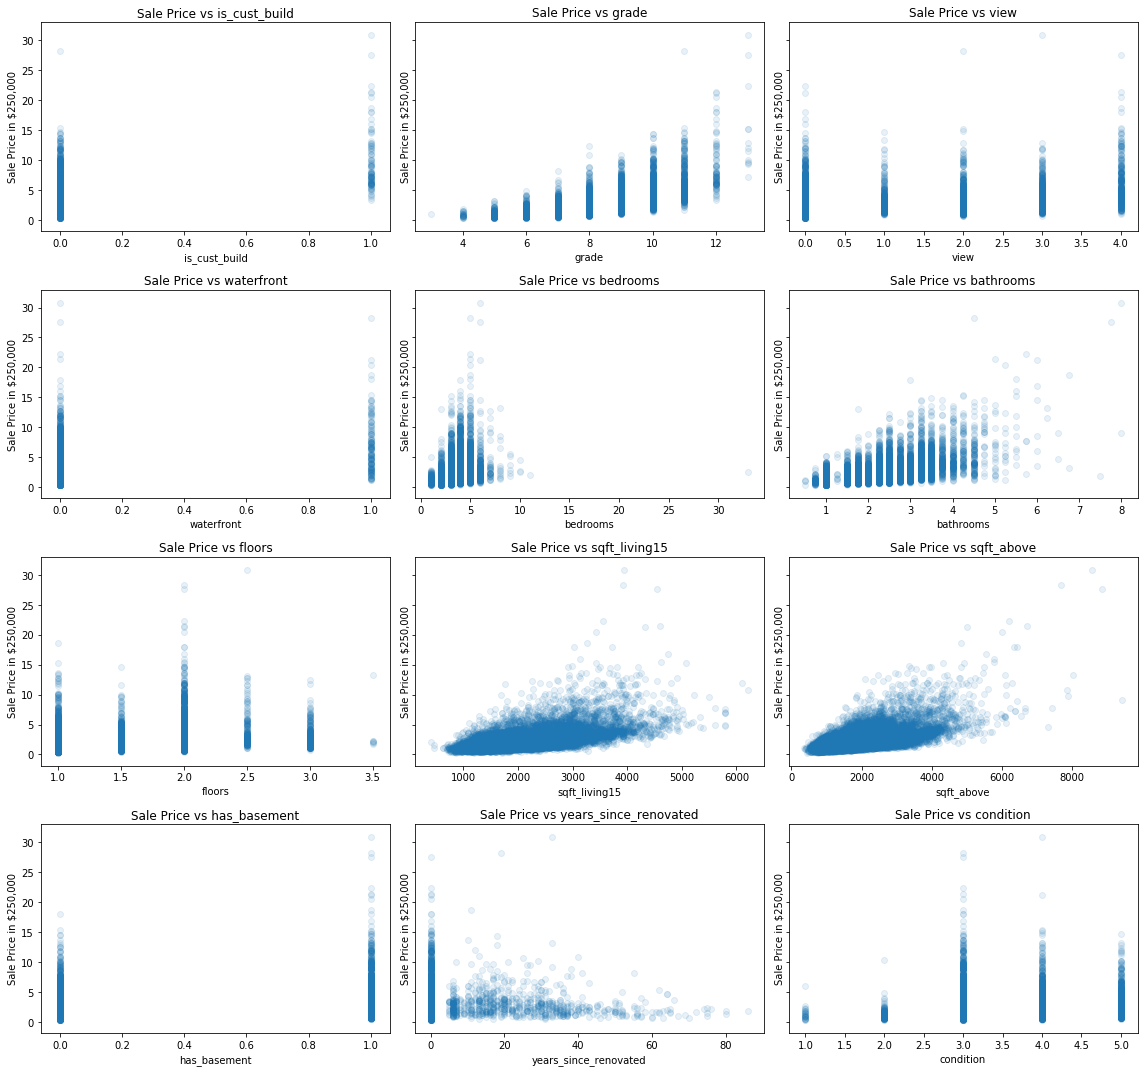

In [6]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), subset.columns):
    ax.scatter(subset[column], df_grade['price'] / 250_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $250,000')

fig.tight_layout()

# Grade vs Columns

In [7]:
subset2 = df_grade.drop(columns=['grade'])

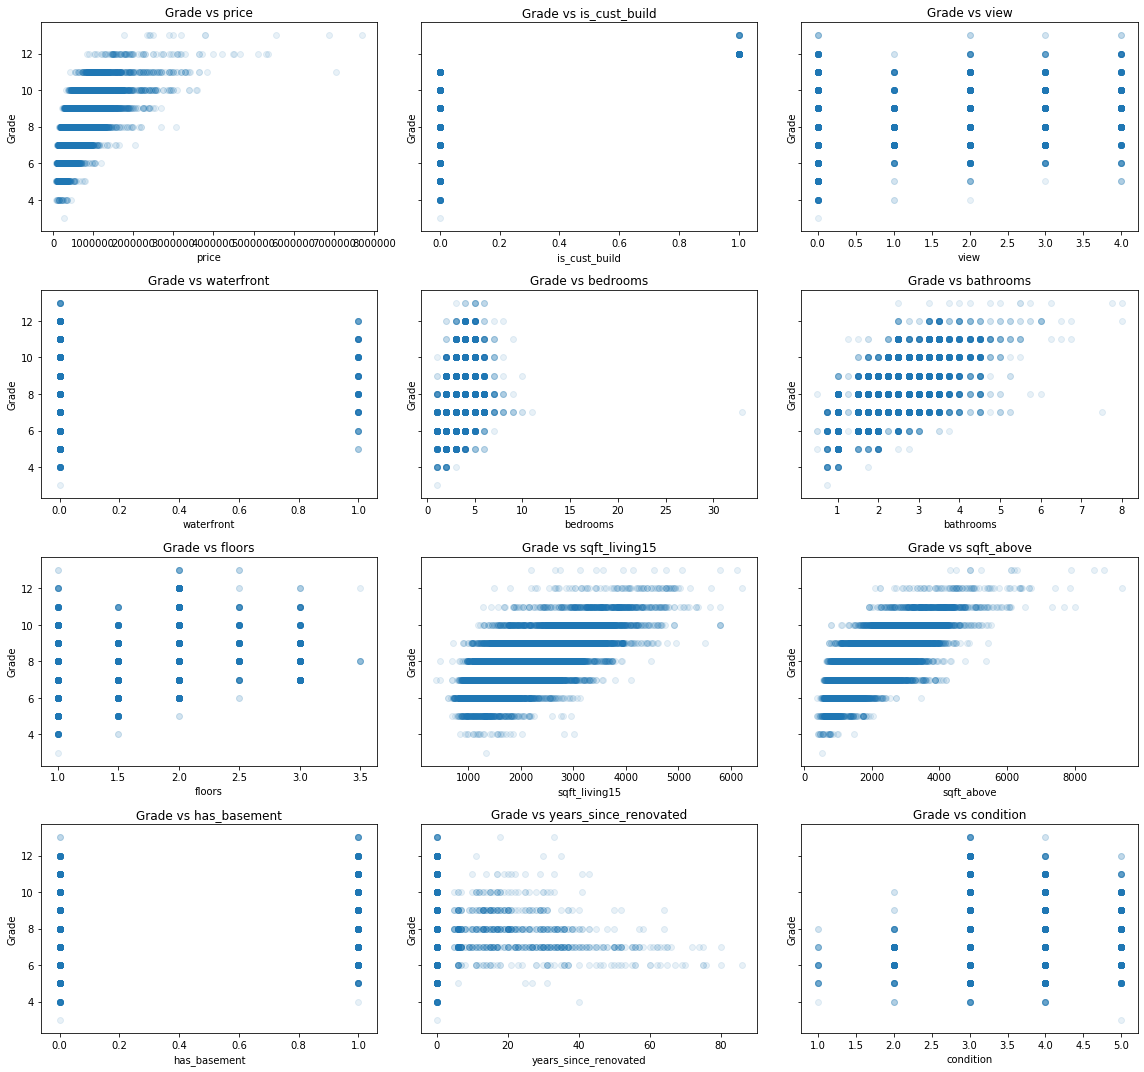

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), subset2.columns):
    ax.scatter(subset2[column], df_grade['grade'], label=column, alpha=.1)
    ax.set_title(f'Grade vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Grade')

fig.tight_layout()

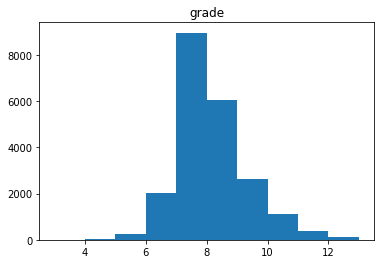

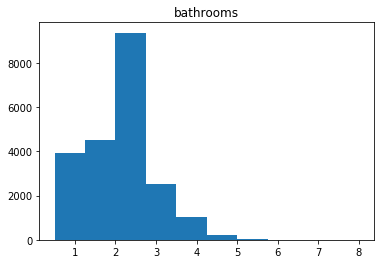

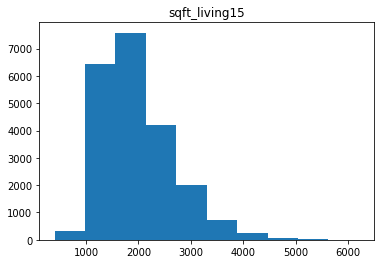

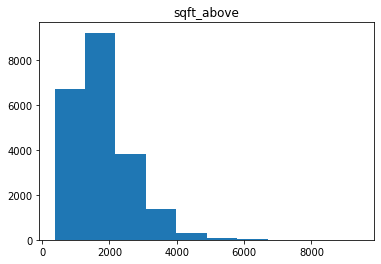

In [15]:
cols= ['grade', 'bathrooms', 'sqft_living15', 'sqft_above']
for col in cols:
    plt.hist(df_grade[col])
    plt.title(col)
    plt.show()

# Log transform

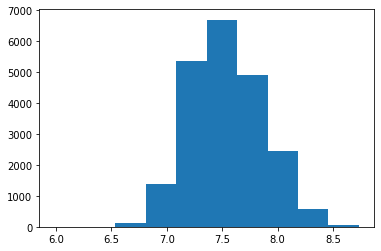

In [17]:
log_sqft_living15 = np.log(df_grade['sqft_living15'])
plt.hist(log_sqft_living15)
plt.show()

In [20]:
stats.skew(df_grade['sqft_living15']), stats.kurtosis(df_grade['sqft_living15'])

(1.1067985186085634, 1.5910865015946518)

In [21]:
stats.skew(log_sqft_living15), stats.kurtosis(log_sqft_living15)

(0.20596327075196807, -0.20828561479785446)

In [ ]:
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['is_cust_build', 'grade', 'view', 'waterfront', 
             'lat', 'long', 'sqft_living', 'bedrooms', 'bathrooms', 
             'floors', 'sqft_living15', 'sqft_above']:
    df_high_corr_and_location[feat] = norm_feat(df_high_corr_and_location[feat])
df_high_corr_and_location.head()

# Removing Grade & Price outliers

- Keep:
    * Grades: 6-10
    * Price: <2 mil

In [29]:
df_grade = df_grade.loc[df_grade['grade'] <11]

In [30]:
df_grade = df_grade.loc[df_grade['price'] <2_000_000]
df_grade = df_grade.loc[df_grade['grade'] >5]
df_grade.head() 

,price,is_cust_build,grade,view,waterfront,bedrooms,bathrooms,floors,sqft_living15,sqft_above,has_basement,years_since_renovated,condition
0,221900.0,0,7,0.0,0.0,3,1.00,1.0,1340,1180,0,0.0,3
1,538000.0,0,7,0.0,0.0,3,2.25,2.0,1690,2170,1,29.0,3
2,180000.0,0,6,0.0,0.0,2,1.00,1.0,2720,770,0,0.0,3
3,604000.0,0,7,0.0,0.0,4,3.00,1.0,1360,1050,1,0.0,5
4,510000.0,0,8,0.0,0.0,3,2.00,1.0,1800,1680,0,0.0,3


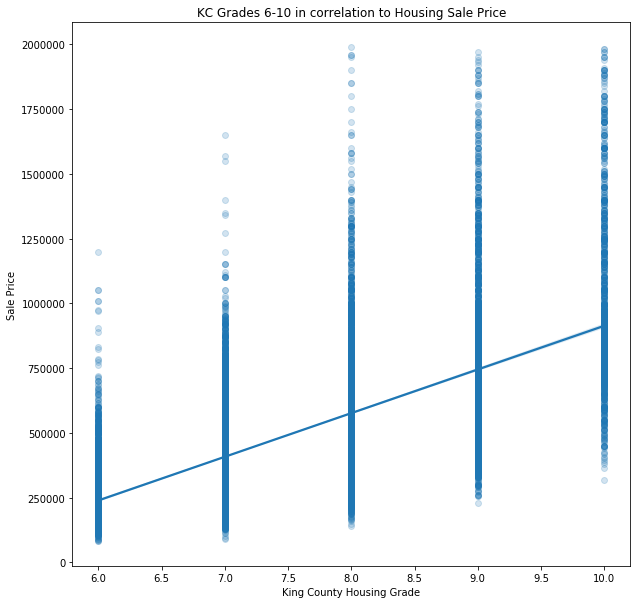

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('KC Grades 6-10 in correlation to Housing Sale Price')
plt.xlabel('King County Housing Grade')
plt.ylabel('Sale Price')

sns.jointplot('grade','price', ax=ax, data=df_grade, kind='reg', joint_kws = {'scatter_kws':dict(alpha=0.2)});


plt.close(2)

# Stats Explore

In [32]:
res = sm.stats.multicomp.pairwise_tukeyhsd(df_grade['price'], df_grade['grade'])
print(res)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
     6      7 100494.4063 0.001  86909.9217 114078.8909   True
     6      8  239485.235 0.001  225309.317  253661.153   True
     6      9 460216.5511 0.001 443830.9987 476602.1035   True
     6     10 688449.1271 0.001 667561.8696 709336.3846   True
     7      8 138990.8287 0.001 129785.9432 148195.7142   True
     7      9 359722.1448 0.001 347382.7934 372061.4963   True
     7     10 587954.7208 0.001 570064.7574 605844.6842   True
     8      9 220731.3162 0.001 207743.7058 233718.9265   True
     8     10 448963.8922 0.001 430620.7948 467306.9895   True
     9     10  228232.576 0.001 208132.8522 248332.2998   True
--------------------------------------------------------------


In [33]:
ols = sm.OLS(df_grade['price'], df_grade['grade'])
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.841
Model:                            OLS   Adj. R-squared (uncentered):              0.841
Method:                 Least Squares   F-statistic:                          1.096e+05
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:57:25   Log-Likelihood:                     -2.8536e+05
No. Observations:               20738   AIC:                                  5.707e+05
Df Residuals:                   20737   BIC:                                  5.707e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
grade       6.865e+04    207.395    330.996      0.000    6.82e+04    6.91e+04
==============================================================================
Omnibus:                     8076.030   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37439.523
Skew:                           1.869   Prob(JB):                         0.00
Kurtosis:                       8.419   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Save Data

In [34]:
df_grade.to_csv('df_grade.csv', index=False)

df = df.drop(columns=['id'])
df.condition.value_counts(),sort_index().plot('bar')
df.groupby('condition').agg('std')['price']
df['condition3'] = df.condition.apply(lambda x: 1 if x >=3 else 0)

res = statsmodels.stats.multicomp.pairwise_tukeyhsd(df['price'], df['condition']) (29:30)

ols = sm.OLS(df['price'], df['condition'])
res = ols.fit()
res.summary()

sns.lmplot(x='condition', y='price', data=df, scatter_kws={"alpha":0.3})
plt.scatter(x=np.arange(1,6), y=np.arange(1,6)*151400(coef)*, c='r')
plt.show()

df_cat = pd.get_dummies(df, columns=['condition'], drop_first=True)
df_cat


kurtosis check fisher = True??? near 0